Para classificarmos novos registros, precisamos ter uma base de dados histórica para que o modelo seja treinado em prol de classificar novos registros 

### Introdução ao Algoritmo Naïve Bayes
Cria uma tabela de aprendizagem (probabilidade)

In [1]:
import pandas as pd
import random 
import numpy as np

In [2]:
dataset = pd.read_csv('../Bases de dados/credit_data.csv')
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [3]:
dataset.dropna(inplace=True)
dataset.shape

(1997, 5)

C:\Users\Matheus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


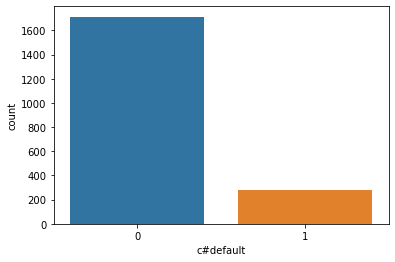

In [4]:
import seaborn as sns # usado para visualização
sns.countplot(dataset['c#default']);
# base de dados está desbalanceada.

In [5]:
# atributos previsores

X = dataset.iloc[:, 1:4].values

In [6]:
X.shape

(1997, 3)

In [7]:
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [8]:
y = dataset.iloc[:, 4].values

In [9]:
y.shape

(1997,)

In [10]:
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

### Divisão e Treinamento da Base de Dados

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, stratify = y)

In [13]:
X_treinamento.shape, y_treinamento.shape # precisam estar iguais

((1597, 3), (1597,))

In [14]:
X_teste.shape, y_teste.shape

((400, 3), (400,))

In [15]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([1714,  283], dtype=int64))

In [16]:
1714 / len(dataset), 283 / len(dataset)

(0.8582874311467201, 0.14171256885327993)

In [17]:
np.unique(y_treinamento, return_counts=True)

(array([0, 1], dtype=int64), array([1371,  226], dtype=int64))

In [18]:
226 / len(y_treinamento)

0.14151534126487164

In [19]:
np.unique(y_teste, return_counts=True)

(array([0, 1], dtype=int64), array([343,  57], dtype=int64))

In [20]:
57 / len(y_teste)

0.1425

### Algoritmo Naïve Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
modelo = GaussianNB()
modelo.fit(X_treinamento, y_treinamento)

GaussianNB()

In [23]:
previsoes = modelo.predict(X_teste)

In [24]:
previsoes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [25]:
y_teste

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(previsoes, y_teste)

0.9225

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
cm = confusion_matrix(previsoes, y_teste)
cm

array([[339,  27],
       [  4,  30]], dtype=int64)

<AxesSubplot:>

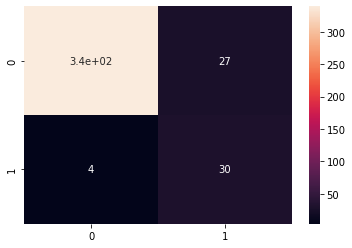

In [30]:
sns.heatmap(cm, annot=True)

In [31]:
# Percentual de acerto para as pessoas que pagam o emprestimo

338 / (338 + 20)

0.9441340782122905

In [32]:
32 / (32 + 7)

0.8205128205128205

### Undersampling & Oversampling

In [33]:
# implementação do Tomek links

from imblearn.under_sampling import TomekLinks

In [38]:
tl = TomekLinks() # segundo a documentação, não tem mais os argumentos
X_under, y_under = tl.fit_resample(X, y)

In [42]:
X_under.shape, y_under.shape

((1897, 3), (1897,))

In [43]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([1714,  283], dtype=int64))

In [44]:
np.unique(y_under, return_counts=True)

(array([0, 1], dtype=int64), array([1614,  283], dtype=int64))

In [45]:
X_treinamento_u, X_teste_u, y_treinamento_u, y_teste_u = train_test_split(X_under, 
                                                                          y_under, 
                                                                          test_size=0.2, 
                                                                          stratify=y_under)
X_treinamento_u.shape, X_teste_u.shape

((1517, 3), (380, 3))

In [46]:
modelo_u = GaussianNB()
modelo_u.fit(X_treinamento_u, y_treinamento_u)
previsoes_u = modelo_u.predict(X_teste_u)
accuracy_score(previsoes_u, y_teste_u)

0.9105263157894737

In [48]:
cm_u = confusion_matrix(previsoes_u, y_teste_u)
cm_u

array([[317,  28],
       [  6,  29]], dtype=int64)

In [49]:
317 / (315 + 28)

0.924198250728863

In [50]:
29 / (29 + 6)

0.8285714285714286

#### Oversampling - SMOTE